# BEE 4750 Homework 1: Introduction to Using Julia

**Name**:

**ID**:

> **Due Date**
>
> Thursday, 9/5/24, 9:00pm

## Overview

### Instructions

-   Problem 1 consist of a series of code snippets for you to interpret
    and debug. You will be asked to identify relevant error(s) and fix
    the code.
-   Problem 2 gives you some code that works as intended; your goal is
    to identify the code’s purpose by following its logic.
-   Problem 3 asks you to write code to generate a random vector and
    subtract off its mean, using a Julia syntax called broadcasting.
-   Problem 4 asks you to convert a verbal description of a wastewater
    treatment system into a Julia function, and then to use that
    function to explore the impact of different wastewater allocation
    strategies.
-   Problem 5 (5750 only) asks you to use more advanced Julia
    techniques.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [8]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `c:\Users\noah\labs\hw1-noahhartman`


Standard Julia practice is to load all needed packages at the top of a
file. If you need to load any additional packages in any assignments
beyond those which are loaded by default, feel free to add a `using`
statement, though [you may need to install the
package](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#package-management).

In [9]:
using Random
using Plots
using GraphRecipes
using LaTeXStrings

In [10]:
# this sets a random seed, which ensures reproducibility of random number generation. You should always set a seed when working with random numbers.
Random.seed!(1)

TaskLocalRNG()

## Problems (Total: 50/60 Points)

### Problem 1 (15 points)

The following subproblems all involve code snippets that require
debugging.

**For each of them**:

-   identify and describe the logic and/or syntax error;
-   write a fixed version of the function;
-   use your fixed function to solve the problem.

#### Problem 1.1

You’ve been tasked with writing code to identify the minimum value in an
array. You cannot use a predefined function. Your colleague suggested
the function below, but it does not return the minimum value.

In [11]:
function minimum(array)
    min_value = 0
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

minimum(array_values) = 0


**Problem 1.1 Write-Up:**

**why doesnt the code above work?**

   [ANSWER]: the code shown above does not display the minimum value because the variable `min_value` is incorrectly indexed to 0. the `min_value` variable would never be updated to properly display the minimum value from the `array_values` variable. instead the value displayed would be 0 since that is what the above code indexed `min_value` to.

**explanation of my solution:**

   [ANSWER]: the code shown below is my attempted solution. to start, i first changed the index of the `min_value` variable from 0 to the `array` variable of given test scores. by doing this, the code will now find the minimum value by starting with the first element in the `array_values` variable and comparing the rest of the values to find the true minimum. additionally, i organized the array of test scores, `array_values` from least to greatest for organizational purposes.

In [12]:
# updated code, comments in this denote/explain the difference between the incorrect code above and the proposed solution
function minimum(array)
    min_value = array[1] # indexing min_value to the first element of the array values
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end
array_values = [78, 89, 90, 95, 95, 98, 99, 100, 100, 100]
@show minimum(array_values)

minimum(array_values) = 78


78

#### Problem 1.2

Your team is trying to compute the average grade for your class, but the
following code produces an error.

In [13]:
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
function class_average(grades)
  average_grade = mean(student_grades)
  return average_grade
end

@show average_grade;

UndefVarError: UndefVarError: `average_grade` not defined

the error in this code is due to the variable "average_grade" being defined in the function itself. by moving the "class_average" variable to the outside of the function it is now accessible, as shown in the code shown below, to allow the "average_grade" to be calculated and displayed (uses the statistics package to allow use of the 'mean' fcn).

**Problem 1.2 Write-Up:**

**why doesnt the code shown above work?**

   [ANSWER]: the code given above recieves an error when ran due to the `average_grade` variable being defined within the function. by moving the the `class_average` variable to the outside of the function, it is now accessible (shown in the code below) to allow the `average_grade` to be calculated

**explanation of my proposed solution:**

   [ANSWER] as previously stated above, by moving the `class_average` variable to the outside of the function, the function can now compute the class average and properly display the `average_grade` variable.

In [14]:
# noah hartman - bee5750 (hw1)
using Statistics
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]

function class_average(grades)
    average_grade = mean(grades)
    return average_grade
end

average_grade = class_average(student_grades)
@show average_grade


average_grade = 94.4


94.4

#### Problem 1.3

Your team wants to know the expected payout of an old Italian dice game
called *passadieci* (which was analyzed by Galileo as one of the first
examples of a rigorous study of probability). The goal of passadieci is
to get at least an 11 from rolling three fair, six-sided dice. Your
strategy is to compute the average wins from 1,000 trials, but the code
you’ve written below produces an error.

In [15]:
function passadieci()
    # this rand() call samples 3 values from the vector [1, 6]
    roll = rand(1:6, 3) 
    return roll
end
n_trials = 1_000
outcomes = zero(n_trials)
for i = 1:n_trials
    outcomes[i] = (sum(passadieci()) > 11)
end
win_prob = sum(outcomes) / n_trials # compute average number of wins
@show win_prob;

MethodError: MethodError: no method matching setindex!(::Int64, ::Bool, ::Int64)

**Problem 1.3 Write-Up:**

**EXPLANATION**

   [ANSWER] there are two problems in the code above. the first much more major problem is the use of `zero` in an attempt to return a scalar vector of the `n_trials` variable is incorrect since `n_trials` is an integer, which is why the error "no method matching setindex!" occurs when the above code is ran. by changing `zero` to `zeros` the code should be fixed due to the code now attempting to create an array instead of a scalar from the `n_trials` variable. lastly, since the goal of the game is to score ATLEAST 11, the statement `...(sum(passadieci()) > 11)` is incorrect since it excludes the possibility of winning the game by scoring an 11. to fix this, the statement was changed in my code (shown below) to `...(sum(passadieci()) >= 11)

In [16]:
function passadieci()
    # this rand() call samples 3 values from the vector [1, 6]
    roll = rand(1:6, 3) 
    return roll
end
n_trials = 1_000
outcomes = zeros(n_trials) # create an array of zeros to store outcomes
for i = 1:n_trials
    outcomes[i] = (sum(passadieci()) >= 11) # "atleast 11", change from > to >=
end
win_prob = sum(outcomes) / n_trials 
@show win_prob;

win_prob = 0.502


### Problem 2 (5 points)

You’ve been handed some code to analyze. The original coder was not very
considerate of other potential users: the function is called
`mystery_function` and there are no comments explaining the purpose of
the code. It appears to take in an array and return some numbers, and
you’ve been assured that the code works as intended.

In [17]:
function mystery_function(values)
    y = []
    for v in values
        if !(v in y)
            append!(y, v)
        end
    end
    return y
end

list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]
@show mystery_function(list_of_values);

mystery_function(list_of_values) = Any[1, 2, 3, 4]


**In this problem**:

-   Explain the purpose of `mystery_function`. 

    **[this function creates an empty array `y`  to remove duplicate values from `v` while keeping the order of the elements as they appear in `v`]**

-   Add comments to the code, explaining why and how it works. Refer to
    [“Best Practices for Writing Code
    Comments”](https://stackoverflow.blog/2021/12/23/best-practices-for-writing-code-comments/),
    and remember that bad comments can be just as bad as no comments at
    all. You do not need to add comments to every line (in fact, this is
    very bad practice), but you should note the *purpose* of every
    “section” of code, and add comments explaining any code sequences
    that you don’t immediately understand.

    **[the comments are shown in the code BELOW this markdown box, not the above code. i prefer to leave the code in question untouched to prevent accidentally adding/removing from it]**

-   Is there a built-in Julia function that does the same thing as
    `mystery_function`? If so, what is it? Use it to do the same thing
    as the code above.

    **[yes, there is, the `unique` function - it works pretty much the exact same as the code (filters and removes repeating numbers while preserving the order in which they appear) SHOWN BELOW]**

In [18]:
function mystery_function(values)
    y = [] # creates empty array "y"
    for v in values
        if !(v in y) # checks if values in 'v'are not already in 'y' (checking for duplicates)
            append!(y, v) # if the above "if" statement is true, append to 'y'
        end
    end
    return y # return 'y', which now only contains unique (non-repeated) values from 'values'
end

list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]
@show mystery_function(list_of_values);

mystery_function(list_of_values) = Any[1, 2, 3, 4]


In [19]:
# hartman bee5750(hw1) - showing the "unique" function
list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]

#`unique` function to remove duplicates
unique_values = unique(list_of_values)
@show unique_values


4-element Vector{Int64}:
 1
 2
 3
 4

unique_values = [1, 2, 3, 4]


### Problem 3 (10 points)

You’re interested in writing some code to remove the mean of a vector.

**In this problem**:

-   Write a function `compute_mean(v)` which sums all of the elements of
    a vector `v` using a `for` loop and computes the mean.
-   Make a random vector `random_vect` of length 10 using Julia’s
    `rand()` function. Use your `compute_mean()` function to calculate
    its mean and subtract it from `random_vect` **without a loop**
    (using a Julia technique called *broadcasting*; feel free to consult
    the Julia documentation and search as necessary). Check that the new
    vector has mean zero.

**Problem 3 Write-Up**

   [ANSWER] to start this problem, i created a function `compute_mean()`, then created a variable, `sum_v` and set the index to 0.0, or as a floating point vector. from there, i created a for loop to sum the values from `v`. mean was then calculated by simply taking the sum and dividing it by the number of terms, or `length` of our vector, `v`. to complete the next half of the problem (testing our function with broadcasting), i made a random vector of length 10 and subtracted the mean from each value of the vector using broadcasting `.-`. lastly, i used rounding to make the final answers look more presentable :)

In [20]:
# bullet point 1
function compute_mean(v)
    sum_v = 0.0  # intitalize sum as a floating point vector
    
    # loop each element in the vector, add it to sum_v
    for i in v
        sum_v += i
    end
    
    # calculate mean
    mean_v = sum_v / length(v)
    return mean_v
end

compute_mean (generic function with 1 method)

In [21]:
# bullet point 2
# random vector w/ length of 10
random_vect = rand(10)

# computing mean of random vector w/ function made in bullet point 1 ("compute_mean()")
mean_val = compute_mean(random_vect)

# subtract the mean from each element of the random vector using broadcasting
zero_mean_vect = random_vect .- mean_val

# compute the mean of the zero-mean vector
new_mean = compute_mean(zero_mean_vect)

# rounding final answers
rounded_random_vect = round.(random_vect, digits=4)
rounded_mean_val = round(mean_val, digits=4)
rounded_zero_mean_vect = round.(zero_mean_vect, digits=4)
rounded_new_mean = round(new_mean, digits=4)

# show the results
@show rounded_random_vect
@show rounded_mean_val
@show rounded_zero_mean_vect
@show rounded_new_mean

rounded_random_vect = [0.1829, 0.456, 0.9595, 0.0179, 0.5521, 0.6354, 0.8137, 0.5646, 0.7292, 0.5918]
rounded_mean_val = 0.5503
rounded_zero_mean_vect = [-0.3674, -0.0943, 0.4092, -0.5323, 0.0018, 0.0851, 0.2634, 0.0143, 0.1789, 0.0415]
rounded_new_mean = 0.0


0.0

### Problem 4 (20 points)

Cheap Plastic Products, Inc. is operating a plant that produces
$100 \text{m}^3\text{/day}$ of wastewater that is discharged into
Pristine Brook. The wastewater contains $1 \text{kg/m}^3$ of YUK, a
toxic substance. The US Environmental Protection Agency has imposed an
effluent standard on the plant prohibiting discharge of more than
$20 \text{kg/day}$ of YUK into Pristine Brook.

Cheap Plastic Products has analyzed two methods for reducing its
discharges of YUK. Method 1 is land disposal, which costs $X_1^2/20$
dollars per day, where $X_1$ is the amount of wastewater disposed of on
the land ($\text{m}^3\text{/day}$). With this method, 20% of the YUK
applied to the land will eventually drain into the stream (*i.e.*, 80%
of the YUK is removed by the soil).

Method 2 is a chemical treatment procedure which costs \$1.50 per
$\text{m}^3$ of wastewater treated. The chemical treatment has an
efficiency of $e= 1 - 0.005X_2$, where $X_2$ is the quantity of
wastewater ($\text{m}^3\text{/day}$) treated. For example, if
$X_2 = 50 \text{m}^3\text{/day}$, then $e = 1 - 0.005(50) = 0.75$, so
that 75% of the YUK is removed.

Cheap Plastic Products is wondering how to allocate their wastewater
between these three disposal and treatment methods (land disposal, and
chemical treatment, and land disposal) to meet the effluent standard
while keeping costs manageable.

The flow of wastewater through this treatment system is shown in
<a href="#fig-wastewater" class="quarto-xref">Figure 1</a>. Modify the
edge labels (by editing the `edge_labels` dictionary in the code
producing <a href="#fig-wastewater" class="quarto-xref">Figure 1</a>) to
show how the wastewater allocations result in the final YUK discharge
into Pristine Brook. For the `edge_label` dictionary, the tuple $(i, j)$
corresponds to the arrow going from node $i$ to node $j$. The syntax for
any entry is `(i, j) => "label text"`, and the label text can include
mathematical notation if the string is prefaced with an `L`, as in
`L"x_1"` will produce $x_1$.

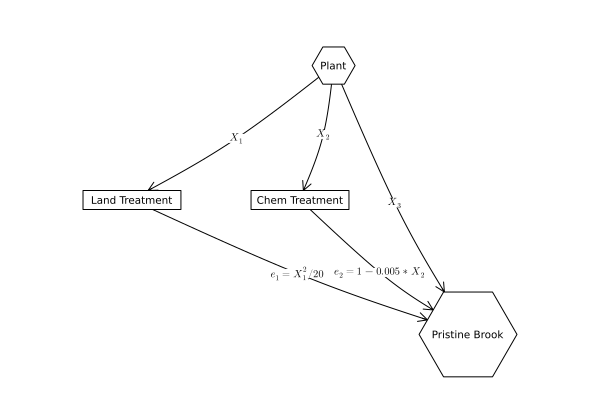

In [25]:
A = [0 1 1 1;
    0 0 0 1;
    0 0 0 1;
    0 0 0 0]

names = ["Plant", "Land Treatment", "Chem Treatment", "Pristine Brook"]
# modify this dictionary to add labels
edge_labels = Dict((1, 2) => L"X_1", (1,3) => L"X_2", (1, 4) => L"X_3",(2, 4) => L"e_1=X^2_1/20",(3, 4) => L"e_2=1-0.005*X_2")
shapes=[:hexagon, :rect, :rect, :hexagon]
xpos = [0, -1.5, -0.25, 1]
ypos = [1, 0, 0, -1]

p = graphplot(A, names=names,edgelabel=edge_labels, markersize=0.15, markershapes=shapes, markercolor=:white, x=xpos, y=ypos)
display(p)

**In this problem**:

-   Formulate a mathematical model for the treatment cost and the amount
    of YUK that will be discharged into Pristine Brook based on the
    wastewater allocations. This is best done with some equations and
    supporting text explaining the derivation. Make sure you include, as
    additional equations in the model, any needed constraints on
    relevant values. You can find some basics on writing mathematical
    equations using the LaTeX typesetting syntax
    [here](https://viveks.me/environmental-systems-analysis/tutorials/latex-notebook.qmd),
    and a cheatsheet with LaTeX commands can be found on the course
    website’s [Resources
    page](https://viveks.me/environmental-systems-analysis/resources/markdown.qmd).

-   Implement your systems model as a Julia function which computes the
    resulting YUK concentration and cost for a particular treatment
    plan. You can return multiple values from a function with a
    [tuple](https://docs.julialang.org/en/v1/manual/functions/#Tuples-1),
    as in:

    ``` {julia}
    function multiple_return_values(x, y)
        return (x+y, x*y)
    end

    a, b = multiple_return_values(2, 5)
    @show a;
    @show b;
    ```

    To evalute the function over vectors of inputs, you can *broadcast*
    the function by adding a decimal `.` before the function arguments
    and accessing the resulting values by writing a *comprehension* to
    loop over the individual outputs in the vector:

    ``` {julia}
    x = [1, 2, 3, 4, 5]
    y = [6, 7, 8, 9, 10]

    output = multiple_return_values.(x, y)
    a = [out[1] for out in output]
    b = [out[2] for out in output]
    @show a;
    @show b;
    ```

    Make sure you comment your code appropriately to make it clear what
    is going on and why.

-   Use your function to experiment with some different combinations of
    wastewater discharge and treatment and plot the results of these
    experiments. Can you find one that satisfies the YUK effluent
    standard (plot this as well as a dashed red line)? What was the
    cost? What can you say about the tradeoff between treatment cost and
    YUK concentration? You don’t have to find an “optimal” solution to
    this problem, but what do you think would be needed to find a better
    solution?

**P4 Write-Up**

   [ANSWER] to start this problem, i created a function for each of the two treatment methods, called `land_treatment_cost` and `chemical_treatment_cost` and included the equations for calculating the treatment method's cost in each of the two functions. for land treatment, the cost equation is $ \frac{X_1^2/}{20} $, where $ {X_1} $ is the amount of wastewater sent to land treatment. for chemical treatment, the cost equation is $ {1.5*X_2} $, where $ {X_2}$ is the amount of wastewater sent to chemical treatment.

   next, a function was created called `YUK_discharge` to calculate the amount of YUK removed from each of the two treatment methods. for land treatment, the YUK removal equation was given to us as $ \text{YUK}_{\text{land}} = 0.2 * X_1 $ while the amount of YUK for chemical treatment was given to us as $ \text{YUK}_{\text{chemical}} = (1-e)*(200-X_2) $ these variables are then addded together to determine the total amount of cost required to treat the wastewater, in a variable called `total_cost`

   then, to test the system of equations and to ensure all the given constraints were properly coded, an array from 0 to 100 in increments of 5 was created for `X1` to test my code. once ran, all values for `X1`, `X2`, `total_cost`, and `YUK_discharge` were all pushed to store for graphing. the optimal solution in terms of treating the wastewater generated at the lowest possible cost, while not exceeding the YUK discharge limits seems to be 15 $\text{m}^3/\text{day} $ sent to land treatment while the remaining wastewater (85 $\text{m}^3/\text{day} $) is sent to chemical treatment. this results in roughly $140USD being spent per day to treat the wastewater while not exceeding the YUK discharge limit.

   lastly, the data is plotted to show a nice graph of the relationship between `X1` and `X2`. The relationship between treatment cost and YUK concentration is directly inverse, that is as treatment costs increase, YUK concentration decreases and vice versa. Additionally, the relationship between the two different treatments are also inversely proportional. For example, if more wastewater that is treated chemically, less wastewater needs to be treated through land. I would say to find a better solution, records of daily influent and effluent flows at the treatment plant would be needed to get the most accurate optimal solution possible.


Optimal X1 (Land Treatment, m^3/d): 15
Optimal X2 (Chemical Treatment, m^3/d): 85
Best YUK Discharge (kg/d): 9.375
Minimum Cost (USD): 138.75


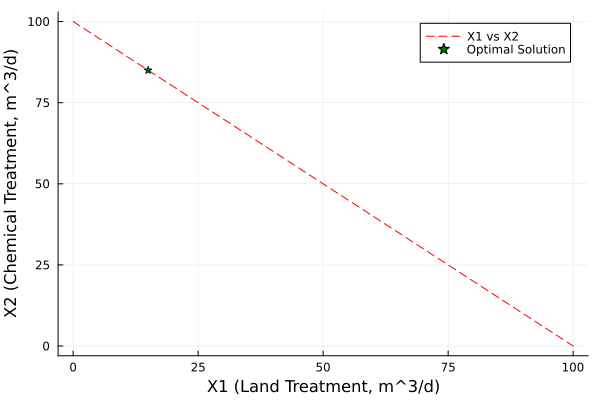

In [1]:
using Plots

# cost function for land disposal
function land_treatment_cost(X1)
    return (X1^2) / 20
end

# cost function for chemical treatment
function chemical_treatment_cost(X2)
    return 1.5 * X2
end

# function to calculate total YUK discharge
function YUK_discharge(X1, X2)
    # YUK from land treatment (20% of YUK drains into the stream)
    YUK_land = 0.2 * X1
    
    # YUK from chemical treatment (remaining YUK after treatment)
    e = 1 - 0.005 * X2
    YUK_chemical = (1 - e) * (100 - X2)
    
    # total YUK discharged into the stream
    return YUK_land + YUK_chemical
end

# function to calculate total cost
function total_cost(X1, X2)
    return land_treatment_cost(X1) + chemical_treatment_cost(X2)
end

# initalizing variables to track the optimal solution
min_cost = Inf
best_X1 = 0
best_X2 = 0
best_YUK_discharge = 0

# storing the X1 and X2 values for plotting purposes later in the code
x1_val=[]
x2_val=[]

# perform experiment to determine the optimal soln
for X1 in 0:5:100
    X2 = 100 - X1  # total flow constraint
    YUK_disch = YUK_discharge(X1, X2)
    if YUK_disch <= 100  # meet the YUK effluent standard
        cost = total_cost(X1, X2)
        if cost < min_cost
            min_cost = cost
            best_X1 = X1
            best_X2 = X2
            best_YUK_discharge = YUK_disch
        end
        push!(x1_val,X1)
        push!(x2_val,X2)
        # recording the results (X1 and X2) for plotting
    end
end

# show the results :)
println("Optimal X1 (Land Treatment, m^3/d): ", best_X1)
println("Optimal X2 (Chemical Treatment, m^3/d): ", best_X2)
println("Best YUK Discharge (kg/d): ", best_YUK_discharge)
println("Minimum Cost (USD): ", min_cost)

plot(x1_val, x2_val, label="X1 vs X2", xlabel="X1 (Land Treatment, m^3/d)", ylabel="X2 (Chemical Treatment, m^3/d)", line=:dash, color=:red, legend=:topright)
scatter!([best_X1], [best_X2], label="Optimal Solution", marker=:star5, color=:green)

### Problem 5 (10 points)

**This problem is only required for students in BEE 5750**.

#### Problem 5.1

Using a
[comprehension](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#comprehensions),
count the number of odd numbers between 0 and 149.

> **Hint**
>
> `iseven()` returns `true` for even numbers and `false` for odd
> numbers.

**P5 Write-Up:**

I created my code without the `iseven()` function and instead opted for the `sum` function. my code checks numbers from 0-149 to test if they are odd with the comprehension statement `if x % 2 !=0`. this tests if a number is odd, and if it is, will add 1 to the sum. the final sum would include all numbers that satisfied the `if x % 2 !=0` statement (these numbers are odd).

In [65]:
odd_numbers = sum(1 for x in 0:149 if x % 2 != 0)
# "if x % 2 != 0" is what checks whether or not a number is even/odd 

75

#### Problem 5.2

Write a function `polynomial(x, a)` which calculates the polynomial
$$p(x) = \sum_{i=1}^n a_i x^i$$

based on a point `x` and a coefficient vector `a` of length `n` using a
loop. Test your function by computing $$p(x) = 2x^3 - x^2 + 1$$ at
$x=2$.

**P5.2 Write-Up:**
    to start, i initalized `p_x` at 0.0 to set it as a floating-point vector. from there, i created a vector 'n' of length 'n'. next, a for loop was created to loop over each coefficent in vector `a` and calculate the polynomial using the equation given to us, $$p(x) = \sum_{i=1}^n a_i x^i$$
    lastly, the code was checked at X=2, which should equal 13, which is the output gievn to us by the code below

In [13]:
# noah hartman - bee5750 hw1q5
function polynomial(x, a)
    p_x = 0.0  # initializing polynomial as a floating-point vector 
    n = length(a)  # setting length of the coefficient
    
    # using a loop over each coefficient and calculate the polynomial
    for i in 1:n
        p_x += a[i] * x^(n - i)
    end
    
    return p_x
end

polynomial (generic function with 1 method)

In [14]:
# testing the function with p(x) = 2x^3 - x^2 +1 @x=2, should be 13.
a = [2, -1, 0, 1]
x = 2
answer = polynomial(x,a)
println(answer)

13.0


## References

List any external references consulted, including classmates.

link used as reference (problem in which the reference was applied)

https://www.jlhub.com/julia/manual/en/function/mean (p1.2)

https://stackoverflow.com/questions/63780190/double-broadcasting-in-julia-for-matrix-vector-addition (p2)

https://discourse.julialang.org/t/how-to-use-unique-function/5266 (p2)

https://docs.julialang.org/en/v1/manual/control-flow/ (p4)

https://docs.juliaplots.org/stable/ (p5)